In [1]:
from enum import unique

import MTCFeatures
from MTCFeatures import MTCFeatureLoader
import pandas as pd
from pandas.core.interchange.dataframe_protocol import DataFrame
from sympy.physics.units import length
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fl = MTCFeatureLoader('MTC-FS-INST-2.0')
seqs = fl.sequences()

In [3]:
%%time
phrase_data = []
for ii, x in enumerate(seqs):
    phrase_data.append({
        'id': x['id'],
        **x['features']
    })

CPU times: total: 6.12 s
Wall time: 9.75 s


In [4]:
data = pd.DataFrame(phrase_data)

In [5]:
data.head()

,id,scaledegree,scaledegreespecifier,tonic,mode,metriccontour,imaweight,pitch40,midipitch,diatonicpitch,...,durationcontour,IOR_frac,lyrics,noncontentword,wordend,phoneme,rhymes,rhymescontentwords,wordstress,melismastate
0,NLB125814_01,"[3, 1, 6, 5, 1, 1, 2, 1, 2, 3, 6, 5, 5, 4, 5, ...","[M, P, M, P, P, P, M, P, M, M, M, P, P, A, P, ...","[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","[major, major, major, major, major, major, maj...","[None, -, -, +, -, +, +, -, -, +, -, +, +, -, ...","[0.798013, 0.663907, 0.150662, 0.945364, 0.013...","[135, 123, 112, 106, 123, 123, 129, 123, 129, ...","[64, 60, 57, 55, 60, 60, 62, 60, 62, 64, 57, 5...","[30, 28, 26, 25, 28, 28, 29, 28, 29, 30, 26, 2...",...,"[None, -, =, +, -, +, =, -, =, =, =, +, =, -, ...","[None, 1/2, 1, 3/2, 1/3, 4, 1, 1/2, 1, 1, 1, 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NLB125815_01,"[5, 5, 6, 5, 4, 3, 1, 3, 3, 3, 3, 6, 5, 5, 6, ...","[P, A, M, P, P, M, P, M, M, M, M, M, P, P, M, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[major, major, major, major, major, major, maj...","[None, -, +, -, +, -, +, -, -, +, -, +, +, -, ...","[0.236646, 0.015528, 0.913043, 0.204348, 0.392...","[163, 164, 169, 163, 157, 152, 140, 152, 152, ...","[72, 73, 74, 72, 70, 69, 65, 69, 69, 69, 69, 7...","[32, 32, 33, 32, 31, 30, 28, 30, 30, 30, 30, 3...",...,"[None, -, +, =, =, =, -, -, =, +, =, +, -, -, ...","[None, 1/3, 4, 1, 1, 1, 1/2, 1/2, 1, 2, 1, 4, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NLB125817_01,"[5, 5, 5, 1, 5, 3, 2, 5, 2, 3, 2, 1, 2, 3, 4, ...","[P, P, P, P, P, M, M, P, M, M, M, P, M, M, P, ...","[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","[major, major, major, major, major, major, maj...","[None, +, -, +, -, +, -, +, -, +, -, +, -, +, ...","[0.246883, 0.306733, 0.169576, 0.780549, 0.349...","[146, 146, 146, 163, 146, 175, 169, 146, 169, ...","[67, 67, 67, 72, 67, 76, 74, 67, 74, 76, 74, 7...","[32, 32, 32, 35, 32, 37, 36, 32, 36, 37, 36, 3...",...,"[None, =, =, +, -, +, -, +, -, +, -, =, =, =, ...","[None, 1, 1, 3, 1/3, 3, 1/3, 6, 1/3, 3/2, 1/3,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NLB125818_01,"[1, 1, 1, 1, 3, 2, 1, 7, 2, 2, 5, 4, 3, 4, 3, ...","[P, P, P, P, m, M, P, m, M, M, P, P, m, P, m, ...","[C, C, C, C, C, C, C, C, C, C, C, C, C, C, C, ...","[minor, minor, minor, minor, minor, minor, min...","[None, +, -, +, +, -, -, +, -, -, +, -, +, -, ...","[0.080378, 0.617021, 0.202128, 0.361702, 0.320...","[163, 163, 163, 163, 174, 169, 163, 157, 169, ...","[72, 72, 72, 72, 75, 74, 72, 70, 74, 74, 79, 7...","[35, 35, 35, 35, 37, 36, 35, 34, 36, 36, 39, 3...",...,"[None, =, =, +, =, -, =, +, -, =, +, -, +, -, ...","[None, 1, 1, 2, 1, 1/2, 1, 2, 1/2, 1, 3, 1/3, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NLB125822_01,"[5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, ...","[P, P, P, P, P, P, P, M, M, M, M, M, M, M, M, ...","[F, F, F, F, F, F, F, F, F, F, F, F, F, F, F, ...","[major, major, major, major, major, major, maj...","[None, -, -, +, -, -, +, -, +, +, -, -, +, -, ...","[0.971634, 0.069592, 0.005484, 0.783094, 0.071...","[163, 163, 163, 163, 163, 163, 163, 152, 152, ...","[72, 72, 72, 72, 72, 72, 72, 69, 69, 69, 69, 6...","[32, 32, 32, 32, 32, 32, 32, 30, 30, 30, 30, 3...",...,"[None, -, =, +, -, =, +, =, +, -, -, =, +, -, ...","[None, 1/2, 1, 2, 1/2, 1, 2, 1, 2, 1/2, 1/2, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.isnull().mean() * 100

id                       0.000000
scaledegree              0.000000
scaledegreespecifier     0.000000
tonic                    0.000000
mode                     0.000000
                          ...    
phoneme                 50.516318
rhymes                  50.516318
rhymescontentwords      50.516318
wordstress              50.516318
melismastate            50.516318
Length: 62, dtype: float64

In [7]:
def check_none_in_lists(column):
    none_in_list = column.apply(lambda x: isinstance(x, list) and None in x)
    return none_in_list.any()

In [8]:
liste_no_none = []
for column_name in data.columns:
    if check_none_in_lists(data[column_name]):
        continue
    else:
        liste_no_none.append(column_name)
liste_no_none

['id',
 'scaledegree',
 'scaledegreespecifier',
 'tonic',
 'mode',
 'imaweight',
 'pitch40',
 'midipitch',
 'diatonicpitch',
 'duration',
 'duration_frac',
 'duration_fullname',
 'onsettick',
 'phrasepos',
 'phrase_ix',
 'phrase_end',
 'songpos',
 'pitch',
 'gpr_Frankland_sum',
 'melismastate']

In [9]:
pre_selection = data[liste_no_none]

In [10]:
pre_selection.describe()

,id,scaledegree,scaledegreespecifier,tonic,mode,imaweight,pitch40,midipitch,diatonicpitch,duration,duration_frac,duration_fullname,onsettick,phrasepos,phrase_ix,phrase_end,songpos,pitch,gpr_Frankland_sum,melismastate
count,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,18109,8961
unique,18109,17246,17254,1514,856,16948,17428,17428,17294,17206,17206,17206,16951,17404,15030,15030,16950,17428,17555,4803
top,NLB125814_01,"[5, 1, 7, 1, 2, 3, 3, 2, 5, 1, 7, 1, 2, 3, 3, ...","[P, M, P, P, P, M, P, M, M, P, M, M, P, P, M, ...","[G, G, G, G, G, G, G, G, G, G, G, G, G, G, G, ...","[major, major, major, major, major, major, maj...","[0.892216, 0.368263, 0.94012, 0.287425, 0.9071...","[135, 152, 147, 152, 158, 163, 163, 158, 135, ...","[64, 69, 68, 69, 71, 72, 72, 71, 64, 69, 68, 6...","[25, 28, 27, 28, 29, 30, 30, 29, 25, 28, 27, 2...","[1.0, 0.5, 1.0, 0.5, 1.0, 0.5, 1.5, 0.5, 0.5, ...","[1, 1/2, 1, 1/2, 1, 1/2, 3/2, 1/2, 1/2, 1/2, 1...","[Quarter, Eighth, Quarter, Eighth, Quarter, Ei...","[0, 1, 2, 3, 5, 7, 8, 9, 12, 13, 14, 15, 17, 1...","[0.0, 0.111111, 0.222222, 0.333333, 0.555556, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...","[False, False, False, False, False, False, Fal...","[0.0, 0.0196078431372549, 0.0392156862745098, ...","[E4, A4, G#4, A4, B4, C5, C5, B4, E4, A4, G#4,...","[0, 0, 0.5, 0.5, 0.5, 0, 0, 0.6964285714285714...","[end, end, end, end, end, end, end, end, end, ..."
freq,1,9,6,156,269,9,5,5,9,7,7,7,9,9,38,38,9,5,5,98


In [30]:
final_list = ['scaledegree','phrase_end']

In [92]:
data_selected = pre_selection[final_list]

C:\Users\Valentin\AppData\Local\Temp\ipykernel_33628\3864101339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['sequence_length'] = data_selected['scaledegree'].apply(len)


Text(0, 0.5, 'Valeur')

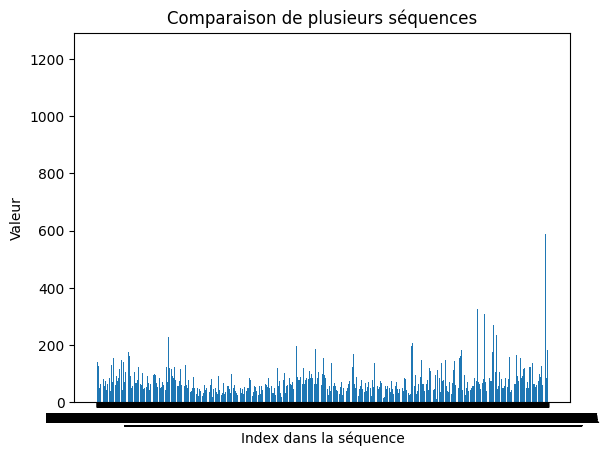

In [13]:
data_selected['sequence_length'] = data_selected['scaledegree'].apply(len)
plt.bar(data_selected['id'], data_selected['sequence_length'])

plt.title('Comparaison de plusieurs séquences')
plt.xlabel('Index dans la séquence')
plt.ylabel('Valeur')

In [14]:
nb_true = []
nbt = 0
nbf = 0
before = None
nb_false = []
for i in data_selected['phrase_end']:
    for j in i:
        if str(j) == "True":
            nbt +=1
            if before == "False" :
                nb_false.append(nbf)
                nbf = 0
            before = "True"
        elif str(j) == "False":
            nbf +=1
            if before == "True" :
                nb_true.append(nbt)
                nbt = 0
            before = "False"
            
nb_false

[11,
 9,
 11,
 9,
 11,
 14,
 11,
 7,
 10,
 8,
 8,
 9,
 8,
 6,
 23,
 16,
 7,
 8,
 7,
 9,
 8,
 8,
 9,
 7,
 10,
 7,
 10,
 7,
 12,
 10,
 10,
 8,
 17,
 13,
 17,
 15,
 14,
 24,
 6,
 6,
 13,
 18,
 19,
 14,
 11,
 8,
 8,
 12,
 7,
 11,
 7,
 9,
 19,
 19,
 19,
 24,
 7,
 8,
 7,
 8,
 7,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 14,
 14,
 14,
 9,
 8,
 8,
 9,
 12,
 9,
 10,
 15,
 16,
 17,
 22,
 9,
 10,
 9,
 7,
 9,
 9,
 9,
 7,
 5,
 6,
 7,
 7,
 5,
 6,
 7,
 7,
 19,
 17,
 27,
 23,
 19,
 17,
 17,
 15,
 5,
 5,
 6,
 8,
 5,
 5,
 6,
 6,
 19,
 17,
 15,
 15,
 22,
 20,
 19,
 19,
 22,
 20,
 13,
 12,
 11,
 10,
 13,
 12,
 19,
 16,
 19,
 16,
 10,
 10,
 11,
 14,
 7,
 9,
 7,
 7,
 19,
 13,
 11,
 11,
 11,
 10,
 18,
 17,
 13,
 15,
 15,
 13,
 21,
 14,
 16,
 12,
 10,
 17,
 10,
 8,
 10,
 8,
 8,
 8,
 10,
 8,
 8,
 9,
 18,
 18,
 10,
 8,
 18,
 15,
 11,
 13,
 11,
 8,
 12,
 8,
 12,
 10,
 13,
 10,
 7,
 8,
 7,
 8,
 8,
 5,
 6,
 15,
 15,
 15,
 9,
 9,
 22,
 21,
 19,
 17,
 12,
 9,
 15,
 13,
 9,
 8,
 10,
 8,
 9,
 8,
 12,
 14,
 10,
 15,
 14,
 12,
 9,
 

In [15]:
np.mean(nb_false)

10.600114564966391

In [16]:
np.median(nb_false)

9.0

In [17]:
np.std(nb_false)

6.24735010981821

In [18]:
max(nb_false), min(nb_false)

(238, 1)

In [19]:
max(nb_true), min(nb_true)

(2, 1)

In [20]:
np.mean(nb_true)

1.0002327121708465

In [21]:
for i in final_list:
    tmp = data_selected[i][6]
    print(f"{i} | {np.unique(tmp)}")

id | ['NLB125824_01']
scaledegree | [1 2 3 4 5 6 7]
scaledegreespecifier | ['A' 'M' 'P']
tonic | ['D' 'G']
mode | ['major']
midipitch | [66 67 68 69 71 72 73 74 76 78 79 81 83]
duration_frac | ['1' '1/2' '2' '3' '3/2']
phrasepos | [0.       0.041667 0.045455 0.083333 0.086957 0.090909 0.111111 0.125
 0.130435 0.136364 0.166667 0.173913 0.181818 0.208333 0.217391 0.222222
 0.227273 0.25     0.26087  0.272727 0.277778 0.291667 0.318182 0.333333
 0.347826 0.363636 0.375    0.391304 0.409091 0.416667 0.434783 0.444444
 0.454545 0.458333 0.478261 0.5      0.521739 0.541667 0.545455 0.555556
 0.583333 0.590909 0.608696 0.625    0.636364 0.652174 0.666667 0.681818
 0.695652 0.708333 0.727273 0.73913  0.75     0.772727 0.777778 0.782609
 0.791667 0.818182 0.833333 0.869565 0.875    0.888889 0.909091 0.913043
 0.916667 0.944444 0.956522 0.958333 1.      ]
phrase_end | [False  True]
songpos | [0.         0.00694444 0.01388889 0.02083333 0.04166667 0.04861111
 0.05555556 0.0625     0.08333333 0.0

In [93]:
data_selected = data_selected[:1000]

In [94]:
def create_subsequences(data, columns, target, length, method='mean'):
    for column in columns:
        data[column] = data[column].apply(lambda x: x[:12] if isinstance(x, (str, list)) else x)

    data[target] = data[target].apply(lambda x: x[:12] if isinstance(x, (str, list)) else x)

    for column in columns:
        new_column_data = []

        # Parcourir chaque élément de la colonne
        for i in data[column]:
            subsequences = []

            # Créer les sous-séquences
            for x in range(1, 4):
                tmp = i[x * 4 - 4:x * 4]
                if method == "mean":
                    mean = np.mean(tmp)
                    subsequences.append(mean)
            # Ajouter les sous-séquences sous forme de liste à la nouvelle colonne
            new_column_data.append(subsequences)

        # Remplacer l'ancienne colonne par la nouvelle liste de sous-séquences
        data[column] = new_column_data
       
    new_target_data = []
     
    for i in data[target]:
        target_subsequences = []

        for x in range(1, 4):
            subsequence = i[x * 4 - 4:x * 4]
            target_value = False
            for z in subsequence:
                if z :
                    target_value = True
                    
                
                    
            target_subsequences.append(target_value)

        new_target_data.append(target_subsequences)

    # Remplacer l'ancienne colonne cible par les nouvelles sous-séquences modifiées
    data[target] = new_target_data

    return data
            

In [95]:
data = create_subsequences(data_selected, ["scaledegree"], "phrase_end", 4)

C:\Users\Valentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Valentin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [98]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data['target_mean'] = data['phrase_end'].apply(lambda x: sum([1 if v else 0 for v in x]) / len(x))

# Convertir la première colonne en une DataFrame
X = pd.DataFrame(data['scaledegree'].tolist())

# Réponse binaire en fonction de la moyenne
y = (data['target_mean'] > 0.5).astype(int)

# Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Évaluer le modèle
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Importance des caractéristiques
importances = model.feature_importances_
feature_names = X.columns
for i in range(len(feature_names)):
    print(f'Importance pour la caractéristique {feature_names[i]} : {importances[i]}')

Accuracy: 0.975
Importance pour la caractéristique 0 : 0.32901111987985004
Importance pour la caractéristique 1 : 0.3273270954436737
Importance pour la caractéristique 2 : 0.3436617846764762


In [38]:
create_subsequences(data_selected, 4, 'phrase_end')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (9,) + inhomogeneous part.

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Exemple de DataFrame avec des listes textuelles et une target
data = pd.DataFrame({
    'col1': [["chat", "chien", "oiseau"], ["chien", "chien", "chat"], ["oiseau", "oiseau"]],
    'col2': [["voiture", "camion"], ["voiture", "moto"], ["moto", "camion"]],
    'target': [["True", "False", "True"], ["True", "True"], ["False", "False"]]
})
# Fonction pour transformer la target en pourcentage de True
data['target_mean'] = data['target'].apply(lambda x: sum([1 if v == "True" else 0 for v in x]) / len(x))
# Transformer les listes textuelles en texte brut pour CountVectorizer
data['col1_str'] = data['col1'].apply(lambda x: ' '.join(x))
data['col2_str'] = data['col2'].apply(lambda x: ' '.join(x))
# Utiliser CountVectorizer pour convertir le texte en caractéristiques
vectorizer = CountVectorizer()
X_col1 = vectorizer.fit_transform(data['col1_str'])
X_col2 = vectorizer.fit_transform(data['col2_str'])
# Transformer les features en DataFrame dense
X_col1_df = pd.DataFrame(X_col1.toarray(), columns=vectorizer.get_feature_names_out())
X_col2_df = pd.DataFrame(X_col2.toarray(), columns=vectorizer.get_feature_names_out())
# Concaténer les colonnes
X = pd.concat([X_col1_df, X_col2_df], axis=1)
y = (data['target_mean'] > 0.5).astype(int)
# Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entraîner un modèle RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)
# Évaluer le modèle
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
# Importance des caractéristiques
importances = model.feature_importances_
feature_names = X.columns
for i in range(len(feature_names)):
    print(f'Importance de {feature_names[i]} : {importances[i]}')

Accuracy: 1.0
Importance de camion : 0.19298245614035087
Importance de moto : 0.3157894736842105
Importance de voiture : 0.19298245614035087
Importance de camion : 0.10526315789473684
Importance de moto : 0.0
Importance de voiture : 0.19298245614035087
